# 데이터사이언스 (0010085001)

## Exercise 15: PyTorch (Linear Models)

* source from : https://github.com/L1aoXingyu/pytorch-beginner

### 1. Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable

In [2]:
# 데이터 생성
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# numpy.array -> torch.tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [3]:
# Linear regression 모델 생성

### torch.nn.Module
# https://pytorch.org/docs/stable/generated/torch.nn.Module.html#module

class linearRegression(nn.Module):
    def __init__(self):
        super(linearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out

model = linearRegression()

In [4]:
# Loss (cost) function 설정

### torch.nn.MSELoss
# https://pytorch.org/docs/stable/nn.html#loss-functions

criterion = nn.MSELoss()

In [5]:
# Optimizer 설정

### torch.optim.SGD (Stochastic gradient descent)
# https://pytorch.org/docs/stable/optim.html

optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

In [6]:
# 모델 학습

num_epochs = 1000

for epoch in range(num_epochs):
    inputs = x_train
    target = y_train

    # forward
    out = model(inputs)
    loss = criterion(out, target)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')

### torch.nn.Module.eval()
# https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.eval
model.eval()

### torch.no_grad()
# https://pytorch.org/docs/stable/generated/torch.no_grad.html#torch.no_grad
with torch.no_grad():
    predict = model(x_train)

predict = predict.data.numpy()

Epoch[20/1000], loss: 40.957615
Epoch[40/1000], loss: 29.027912
Epoch[60/1000], loss: 20.596622
Epoch[80/1000], loss: 14.637820
Epoch[100/1000], loss: 10.426437
Epoch[120/1000], loss: 7.450032
Epoch[140/1000], loss: 5.346441
Epoch[160/1000], loss: 3.859706
Epoch[180/1000], loss: 2.808932
Epoch[200/1000], loss: 2.066270
Epoch[220/1000], loss: 1.541366
Epoch[240/1000], loss: 1.170360
Epoch[260/1000], loss: 0.908121
Epoch[280/1000], loss: 0.722753
Epoch[300/1000], loss: 0.591713
Epoch[320/1000], loss: 0.499069
Epoch[340/1000], loss: 0.433561
Epoch[360/1000], loss: 0.387231
Epoch[380/1000], loss: 0.354456
Epoch[400/1000], loss: 0.331260
Epoch[420/1000], loss: 0.314835
Epoch[440/1000], loss: 0.303194
Epoch[460/1000], loss: 0.294935
Epoch[480/1000], loss: 0.289066
Epoch[500/1000], loss: 0.284886
Epoch[520/1000], loss: 0.281900
Epoch[540/1000], loss: 0.279758
Epoch[560/1000], loss: 0.278212
Epoch[580/1000], loss: 0.277088
Epoch[600/1000], loss: 0.276262
Epoch[620/1000], loss: 0.275646
Epoch[6

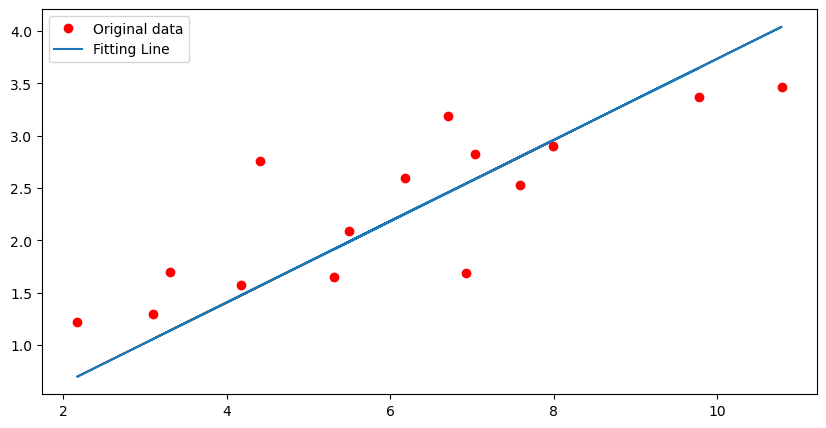

In [7]:
# 학습 결과 시각화

fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')

plt.legend() 
plt.show()

In [8]:
# 모델 저장 (즉, 학습으로 얻은 weights 를 저장)

torch.save(model.state_dict(), './linear.pth')

### 2. Logistic Regression

In [10]:
conda install torchvision -c pytorch

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\gkdms\anaconda3

  added / updated specs:
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.05.30 |       haa95532_0         120 KB
    certifi-2023.5.7           |  py310haa95532_0         153 KB
    torchvision-0.13.1         |cpu_py310h378ed51_0         6.1 MB
    ------------------------------------------------------------
                                           Total:         6.4 MB

The following NEW packages will be INSTALLED:

  torchvision        pkgs/main/win-64::torchvision-0.13.1-cpu_py310h378ed51_0 

The following packages will be UPDATED:

  ca-certificates                     2023.01.10-haa95532_0 --> 2023.05.30-haa95532_0 
  certifi                         2022.12.7-py310haa95532_0 --> 2023.5.7-py310haa95532_0 




torchvision-0.13.1   | 



==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




In [11]:
import time

import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [12]:
# 학습 파라미터 설정

batch_size = 64
learning_rate = 1e-3
num_epochs = 10

In [13]:
# 데이터셋 설정

### torchvision.datasets.FashionMNIST
# https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

train_dataset = datasets.FashionMNIST(root='./data', 
                                      train=True, download=True,
                                      transform=transforms.ToTensor())

test_dataset = datasets.FashionMNIST(root='./data', train=False, 
                                     transform=transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [14]:
# 데이터 로더 설정

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [15]:
# Logistic regression 모델 생성

class Logistic_Regression(nn.Module):
    def __init__(self, in_dim, n_class):
        super(Logistic_Regression, self).__init__()
        self.logistic = nn.Linear(in_dim, n_class)

    def forward(self, x):
        out = self.logistic(x)
        return out

model = Logistic_Regression(28 * 28, 10)

use_gpu = torch.cuda.is_available()
if use_gpu:
    model = model.cuda()

In [16]:
# Loss (cost) function 설정

criterion = nn.CrossEntropyLoss()

In [17]:
# Optimizer 설정

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [18]:
# 모델 학습

for epoch in range(num_epochs):
    print('*' * 10)
    print(f'epoch {epoch+1}')
    
    since = time.time()
    running_loss = 0.0
    running_acc = 0.0
    
    model.train()
    for i, data in enumerate(train_loader, 1):
        img, label = data
        img = img.view(img.size(0), -1)  # 将图片展开成 28x28
    
        if use_gpu:
            img = img.cuda()
            label = label.cuda()
    
        # forward
        out = model(img)
    
        # calculate error
        loss = criterion(out, label)
    
        running_loss += loss.item()


        _, pred = torch.max(out, 1)
        running_acc += (pred==label).float().mean()
    
        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 300 == 0:
            print(f'[{epoch+1}/{num_epochs}] Loss: {running_loss/i:.6f}, Acc: {running_acc/i:.6f}')
    
    print(f'Finish {epoch+1} epoch, Loss: {running_loss/i:.6f}, Acc: {running_acc/i:.6f}')

    # 모델 평가 (test)    
    model.eval()

    eval_loss = 0.
    eval_acc = 0.

    for data in test_loader:
        img, label = data
        img = img.view(img.size(0), -1)

        if use_gpu:
            img = img.cuda()
            label = label.cuda()
        
        with torch.no_grad():
            out = model(img)
            loss = criterion(out, label)
        
        eval_loss += loss.item()
        _, pred = torch.max(out, 1)
        eval_acc += (pred == label).float().mean()

    print(f'Test Loss: {eval_loss/len(test_loader):.6f}, Acc: {eval_acc/len(test_loader):.6f}')
    print(f'Time:{(time.time()-since):.1f} s')

**********
epoch 1
[1/10] Loss: 2.078689, Acc: 0.358281
[1/10] Loss: 1.884166, Acc: 0.494167
[1/10] Loss: 1.742514, Acc: 0.548750
Finish 1 epoch, Loss: 1.727816, Acc: 0.553172
Test Loss: 1.369702, Acc: 0.654160
Time:8.8 s
**********
epoch 2
[2/10] Loss: 1.300922, Acc: 0.668490
[2/10] Loss: 1.252645, Acc: 0.672630
[2/10] Loss: 1.212086, Acc: 0.675868
Finish 2 epoch, Loss: 1.207075, Acc: 0.676522
Test Loss: 1.105009, Acc: 0.677249
Time:9.8 s
**********
epoch 3
[3/10] Loss: 1.062188, Acc: 0.693594
[3/10] Loss: 1.048448, Acc: 0.691953
[3/10] Loss: 1.029136, Acc: 0.696042
Finish 3 epoch, Loss: 1.026897, Acc: 0.696045
Test Loss: 0.983838, Acc: 0.693571
Time:11.4 s
**********
epoch 4
[4/10] Loss: 0.961246, Acc: 0.708438
[4/10] Loss: 0.947826, Acc: 0.710964
[4/10] Loss: 0.934997, Acc: 0.713698
Finish 4 epoch, Loss: 0.932836, Acc: 0.714702
Test Loss: 0.911852, Acc: 0.711186
Time:13.2 s
**********
epoch 5
[5/10] Loss: 0.896676, Acc: 0.721198
[5/10] Loss: 0.883452, Acc: 0.726641
[5/10] Loss: 0.87

In [ ]:
# 모델 저장 (즉, 학습으로 얻은 weights 를 저장)

torch.save(model.state_dict(), './logstic.pth')